# Analyze EV incentives wrt the top 5 EV models sold in the US in the last 10 years
Question to answer: Do state and utility/private incentives influence the rate of electric vehicle purchases?

Will use HEV sales from 1999 - 2021 and PEV (EV and PHEV) sales from 2011-2021 from US Dept of Energy (https://afdc.energy.gov/data/search?q=sales)

Will use energy laws/incentives provided by US Dept of Energy (https://afdc.energy.gov/laws)

Use linear regression to answer question: https://realpython.com/linear-regression-in-python/ 

Utility/Private incentives meaning: https://afdc.energy.gov/laws/utility-examples

## Get Data

In [121]:
import pandas as pd

In [122]:
hev_sales_df = pd.read_csv('hev_sales.csv')
hev_sales_df

,Vehicle,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Honda Insight,17,"3,788","4,726","2,216","1,168",583,666,722,3,...,"15,549","5,846","4,802","3,965","1,458",75,3,"12,510","23,686","123,317"
1,Toyota Prius,-,"5,562","15,556","20,119","24,627","53,991","107,897","106,971","181,221",...,"136,463","223,906","222,140","194,108","180,603","134,155","87,725","59,995","47,862","2,242,397"
2,Honda Civic,-,-,-,"13,707","21,771","26,013","25,864","31,253","32,575",...,"4,703","7,156","7,719","5,070","4,887",896,65,6,-,"235,437"
3,Ford Escape/Mercury Mariner,-,-,-,-,-,"2,993","15,960","22,549","25,108",...,"10,089","1,441",-,-,-,-,-,-,-,"126,230"
4,Honda Accord,-,-,-,-,-,653,"16,826","5,598","3,405",...,-,-,996,"13,977","11,065","9,179","22,008","17,188","23,817","124,911"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,Nissan Rogue Hybrid,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,"3,363","4,205","7,568"
57,Lexus LS 500h,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,123,-,123
58,Lexus UX,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,"8,603","8,603"
59,Toyota Corolla,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,"16,299","16,299"


In [123]:
pev_sales_df = pd.read_csv('pev_sales.csv')
pev_sales_df

,Vehicle,Type,2011,2012,2013,2014,2015,2016,2017,2018,2019,Total
0,Chevy Volt,PHEV,"7,671","23,461","23,094","18,805","15,393","24,739","20,349","18,306","4,915","156,733"
1,Nissan Leaf,EV,"9,674","9,819","22,610","30,200","17,269","14,006","11,230","14,715","12,365","141,888"
2,Smart ED,EV,342,139,923,"2,594","1,387",657,544,"1,219",680,"8,485"
3,Mitsubishi I EV,EV,76,588,"1,029",196,115,94,6,-,-,"2,104"
4,BMW Active E,EV,-,673,-,-,-,-,-,-,-,673
5,Prius PHEV,PHEV,-,"12,749","12,088","13,264","4,191","2,474","20,936","27,595","23,630","116,927"
6,Ford Focus EV,EV,-,683,"1,738","1,964","1,582",901,"1,817",560,-,"9,245"
7,Honda Fit EV,EV,-,93,569,407,2,-,-,-,-,"1,071"
8,Tesla Model S,EV,-,"2,400","19,400","16,750","26,200","30,200","26,500","25,745","15,090","162,285"
9,Toyota RAV4 EV,EV,-,192,"1,005","1,184",18,-,-,-,-,"2,399"


In [124]:
all_sales_df = pd.read_csv('sales_electric_pev_hev.csv', index_col=0, na_values=['0']).fillna(0)
all_sales_df.loc['Total'] = all_sales_df.sum()
all_sales_df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Hybrid electric,9350.0,20282.0,36042.0,47566.0,84233.0,205876.0,251864.0,351071.0,315763.0,290273.0,...,268749.0,434648.0,495535.0,452172.0,384400.0,346949.0,362868.0,338083.0,380794.0,454890.0
Plug-in hybrid-electric,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7671.0,38584.0,49008.0,55357.0,42959.0,72885.0,91188.0,123883.0,85791.0,66157.0
Electric,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10092.0,14587.0,48094.0,63525.0,71064.0,86731.0,104487.0,207062.0,233822.0,240053.0
Total,9350.0,20282.0,36042.0,47566.0,84233.0,205876.0,251864.0,351071.0,315763.0,290273.0,...,286512.0,487819.0,592637.0,571054.0,498423.0,506565.0,558543.0,669028.0,700407.0,761100.0


In [125]:
ev_laws_incentives_df = pd.read_csv('laws_and_incentives(11_16_2021).csv')

## Preprocess Data

In [126]:
from datetime import datetime
now = datetime.now()
dt_string = now.strftime("%Y-%m-%d %H:%M:%S UTC")

# drop columns that aren't needed: references, sequence number
ev_laws_incentives_df.drop('References', axis=1, inplace=True)
ev_laws_incentives_df.drop('Sequence Number', axis=1, inplace=True)

# drop rows where law/incentive has been repealed or is now archived and not relevant or has expired already
ev_laws_incentives_df['Expired Date'] = pd.to_datetime(ev_laws_incentives_df['Expired Date'], infer_datetime_format=True)
ev_laws_incentives_df['Archived Date'] = pd.to_datetime(ev_laws_incentives_df['Archived Date'], infer_datetime_format=True)
ev_laws_incentives_df['Repealed Date'] = pd.to_datetime(ev_laws_incentives_df['Repealed Date'], infer_datetime_format=True)

# get the current laws that are relevant
ev_current_laws_df = ev_laws_incentives_df[~(ev_laws_incentives_df['Expired Date'] < dt_string)]
ev_current_laws_df = ev_current_laws_df[~(ev_current_laws_df['Archived Date'] < dt_string)]
ev_current_laws_df = ev_current_laws_df[~(ev_current_laws_df['Repealed Date'] < dt_string)]

# drop these columns now
ev_current_laws_df.drop('Expired Date', axis=1, inplace=True)
ev_current_laws_df.drop('Archived Date', axis=1, inplace=True)
ev_current_laws_df.drop('Repealed Date', axis=1, inplace=True)

In [127]:
# get only incentives
ev_incentives_df = ev_current_laws_df[ev_current_laws_df['Type'].str.contains("Incentives")]
ev_incentives_df

,Law Id,State,Title,Text,Enacted Date,Amended Date,Recent?,Type,Agency,Significant Update Date,Topic,Technology Categories,Incentive Categories,Regulation Categories,User Categories
13,392,US,Improved Energy Technology Loans,The U.S. Department of Energy (DOE) provides l...,2005-08-08 00:00:00 UTC,NaN,False,Incentives,U.S. Department of Energy,2017-01-11 15:46:16 UTC,NaN,BIOD|ETH|ELEC|HY|NG|PHEV|LPG,LOANS,NaN,OTHER
14,409,US,Qualified Plug-In Electric Vehicle (PEV) Tax C...,A tax credit is available for the purchase of ...,2008-10-03 00:00:00 UTC,2013-01-02 00:00:00 UTC,False,Incentives,U.S. Internal Revenue Service,NaN,NaN,ELEC|PHEV,TAX,NaN,FLEET|IND
15,411,US,Advanced Technology Vehicle (ATV) and Alternat...,Through the Advanced Technology Vehicles Manuf...,2007-12-17 00:00:00 UTC,2009-10-28 00:00:00 UTC,False,Incentives,U.S. Department of Energy,2017-01-11 15:44:49 UTC,NaN,ELEC|EFFEC|HEV|PHEV,LOANS,NaN,MAN
17,4178,AZ,Alternative Fuel Vehicle (AFV) Emissions Test ...,Qualified AFVs registered for the first time i...,2016-01-01 00:00:00 UTC,NaN,False,State Incentives,NaN,2015-05-13 18:37:27 UTC,NaN,ELEC|HY|NG|LPG,EXEM,NaN,FLEET|GOV|IND
18,4179,AZ,Reduced Alternative Fuel Vehicle (AFV) License...,The vehicle license tax for an AFV registered ...,2018-04-25 00:00:00 UTC,2019-06-07 00:00:00 UTC,False,State Incentives,NaN,2019-06-28 23:33:14 UTC,NaN,ELEC|HY|NG|PHEV|LPG,TAX,NaN,FLEET|GOV|IND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,12719,CA,Electric Vehicle Supply Equipment (EVSE) Grant...,Antelope Valley Air Quality Management Distric...,NaN,NaN,True,State Incentives,NaN,2021-11-16 00:22:46 UTC,NaN,ELEC|PHEV,GNT,NaN,STATION|FLEET|MUD|OTHER
894,12720,CA,Electric Forklift Rebate - Alameda Municipal P...,AMP offers commercial customers a rebate of \$...,NaN,NaN,True,Utility/Private Incentives,NaN,2021-11-16 00:26:02 UTC,NaN,ELEC|OTHER,RBATE,NaN,FLEET
895,12721,CA,Used Battery-Electric Vehicle (BEV) Rebate - A...,"AMP provides cash rebates of up to \$1,500 for...",NaN,NaN,True,Utility/Private Incentives,NaN,2021-11-16 00:27:44 UTC,NaN,ELEC,RBATE,NaN,IND
896,12722,CA,Residential Electric Vehicle Supply Equipment ...,The Los Angeles Department of Water and Power ...,NaN,NaN,True,Utility/Private Incentives,NaN,2021-11-16 00:30:27 UTC,NaN,ELEC|PHEV,RBATE,NaN,FLEET|IND


In [128]:
# get only laws
ev_laws_df = ev_current_laws_df[ev_current_laws_df['Type'].str.contains('Laws and Regulations')]
ev_laws_df

,Law Id,State,Title,Text,Enacted Date,Amended Date,Recent?,Type,Agency,Significant Update Date,Topic,Technology Categories,Incentive Categories,Regulation Categories,User Categories
5,344,US,Vehicle Incremental Cost Allocation,The U.S. General Services Administration (GSA)...,1992-10-24 00:00:00 UTC,2005-08-08 00:00:00 UTC,False,Laws and Regulations,U.S. General Services Administration,NaN,NaN,BIOD|ETH|ELEC|HY|NG|PHEV|LPG,NaN,REQ,GOV
6,347,US,Vehicle Acquisition and Fuel Use Requirements ...,"Under the Energy Policy Act (EPAct) of 1992, a...",1992-10-24 00:00:00 UTC,2007-03-20 00:00:00 UTC,False,Laws and Regulations,U.S. Department of Energy,2015-01-02 16:15:19 UTC,NaN,BIOD|ETH|ELEC|EFFEC|HY|NG|PHEV|LPG,NaN,REQ,FLEET|GOV
7,357,US,Vehicle Acquisition and Fuel Use Requirements ...,"Under the Energy Policy Act (EPAct) of 1992, 7...",1992-10-24 00:00:00 UTC,2021-01-27 00:00:00 UTC,False,Laws and Regulations,U.S. Department of Energy,2021-04-06 23:22:28 UTC,NaN,BIOD|ETH|ELEC|EFFEC|HEV|HY|NG|PHEV|LPG,NaN,REQ,GOV
8,358,US,Vehicle Acquisition and Fuel Use Requirements ...,"Under the Energy Policy Act (EPAct) of 1992, t...",1992-10-24 00:00:00 UTC,2008-03-14 00:00:00 UTC,False,Laws and Regulations,U.S. Department of Energy,NaN,NaN,BIOD|ETH|ELEC|HY|NG|PHEV|LPG,NaN,REQ,FLEET|GOV
10,386,US,High Occupancy Vehicle (HOV) Lane Exemption,States are allowed to exempt certified alterna...,2005-08-10 00:00:00 UTC,2015-12-04 00:00:00 UTC,False,Laws and Regulations,U.S. Department of Transportation,2015-12-14 22:09:37 UTC,NaN,BIOD|ETH|ELEC|EFFEC|HY|NG|OTHER|PHEV|LPG,NaN,DREST,IND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,12711,WI,Regional Electric Vehicle (REV) Midwest Plan,"Wisconsin joined Illinois, Indiana, Michigan, ...",2021-09-30 00:00:00 UTC,NaN,True,Laws and Regulations,NaN,2021-11-12 18:44:02 UTC,NaN,ELEC|PHEV,NaN,REQ|OTHER,STATION|MAN|GOV|OTHER
889,12714,SC,Public Utility Definition,An entity that operates electric vehicle suppl...,NaN,NaN,True,Laws and Regulations,NaN,2021-11-12 20:24:55 UTC,NaN,ELEC|PHEV,NaN,UTILITY,STATION
890,12715,IL,Zero-Emission Vehicles (ZEV) Deployment Support,The Illinois Department of Central Management ...,2021-04-22 00:00:00 UTC,NaN,True,Laws and Regulations,NaN,2021-11-15 23:13:03 UTC,NaN,ELEC,NaN,CCEINIT,GOV
898,12725,CA,Zero-Emission Vehicle (ZEV) Requirements for T...,The California Air Resource Board (CARB) and t...,2019-01-01 00:00:00 UTC,NaN,True,Laws and Regulations,NaN,2021-11-16 01:11:00 UTC,NaN,ELEC|HY|PHEV,NaN,REQ,GOV


In [129]:
# not sure what programs are but here they are
ev_programs_df = ev_current_laws_df[ev_current_laws_df['Type'].str.contains('Programs')]
ev_programs_df

,Law Id,State,Title,Text,Enacted Date,Amended Date,Recent?,Type,Agency,Significant Update Date,Topic,Technology Categories,Incentive Categories,Regulation Categories,User Categories
0,284,US,Congestion Mitigation and Air Quality (CMAQ) I...,The CMAQ Program provides funding to state dep...,2005-08-10 00:00:00 UTC,NaN,False,Programs,U.S. Department of Transportation,NaN,NaN,BIOD|ETH|ELEC|HY|IR|NG|PHEV|LPG,GNT,NaN,STATION|FLEET|GOV
1,288,US,Clean Cities Coalition Network,The mission of Clean Cities Coalition Network ...,NaN,NaN,False,Programs,U.S. Department of Energy,NaN,NaN,AFTMKTCONV|BIOD|ETH|ELEC|EFFEC|HEV|HY|IR|NG|NE...,GNT|OTHER,NaN,STATION|AFP|PURCH|MAN|FLEET|GOV|IND
2,317,US,State Energy Program (SEP) Funding,The SEP provides grants to states to assist in...,NaN,NaN,False,Programs,U.S. Department of Energy,NaN,NaN,BIOD|ETH|ELEC|EFFEC|HY|NG|PHEV|LPG,GNT,NaN,OTHER
3,324,US,Clean Construction and Agriculture,Clean Construction is a voluntary program that...,NaN,NaN,False,Programs,U.S. Environmental Protection Agency,NaN,NaN,BIOD|ELEC|HEV|HY|NG|PHEV|LPG,GNT,NaN,PURCH|FLEET|OTHER
4,325,US,Ports Initiative,The U.S. Environmental Protection Agency\'s (E...,NaN,NaN,False,Programs,U.S. Environmental Protection Agency,NaN,NaN,BIOD|ELEC|HEV|HY|NG|PHEV|LPG,GNT|OTHER,NaN,FLEET|GOV
9,383,US,Voluntary Airport Low Emission (VALE) Program,The goal of the VALE Program is to reduce grou...,2005-08-10 00:00:00 UTC,NaN,False,Programs,U.S. Department of Transportation,NaN,NaN,BIOD|ETH|ELEC|HEV|HY|NG|PHEV|LPG,GNT,NaN,STATION|FLEET


## Get number of incentives per year

In [130]:
import numpy as np

In [131]:
# convert date columns to datetime type
ev_incentives_df['Enacted Date'] = ev_incentives_df['Enacted Date'].astype('datetime64[ns]')
ev_incentives_df['Enacted Date'] = pd.to_datetime(ev_incentives_df['Enacted Date'])
ev_incentives_df['Amended Date'] = pd.to_datetime(ev_incentives_df['Amended Date']).astype('datetime64[ns]')
ev_incentives_df['Significant Update Date'] = pd.to_datetime(ev_incentives_df['Significant Update Date']).astype('datetime64[ns]')
ev_incentives_df['Earliest Date'] = np.nan

C:\Users\eurydice\AppData\Local\Temp/ipykernel_19004/411025582.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_incentives_df['Enacted Date'] = ev_incentives_df['Enacted Date'].astype('datetime64[ns]')
C:\Users\eurydice\AppData\Local\Temp/ipykernel_19004/411025582.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_incentives_df['Enacted Date'] = pd.to_datetime(ev_incentives_df['Enacted Date'])
C:\Users\eurydice\AppData\Local\Temp/ipykernel_19004/411025582.py:4: SettingWithCopyWarning: 
A value is 

In [132]:
min_dates = ev_incentives_df[['Enacted Date', 'Significant Update Date', 'Amended Date']].min(axis=1)
ev_incentives_df['Earliest Date'] = min_dates
ev_incentives_df.sort_values('Earliest Date')
# drop rows with null earliest dates
ev_incentives_df = ev_incentives_df[~pd.isnull(ev_incentives_df['Earliest Date'])]
ev_incentives_df.drop('Enacted Date', axis=1, inplace=True)
ev_incentives_df.drop('Significant Update Date', axis=1, inplace=True)
ev_incentives_df.drop('Amended Date', axis=1, inplace=True)

C:\Users\eurydice\AppData\Local\Temp/ipykernel_19004/4118455466.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_incentives_df['Earliest Date'] = min_dates
C:\Users\eurydice\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [133]:
# help in counting total incentives for each year
ev_incentives_df['n'] = 1

C:\Users\eurydice\AppData\Local\Temp/ipykernel_19004/2227456266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ev_incentives_df['n'] = 1


In [141]:
ev_incentives_pivot = pd.pivot_table(ev_incentives_df,values='n',index=ev_incentives_df['Earliest Date'].dt.year,aggfunc=np.sum, fill_value=0).cumsum(axis=0)
ev_incentives_pivot
# ev_sum_incentives = ev_incentives_pivot.sum(axis=0)
# ev_sum_incentives

,n
Earliest Date,
1992,3
1993,6
1995,7
1996,8
1999,9
2001,10
2002,11
2004,14
2005,20


In [144]:
ev_sum_from_1999 = ev_sum_incentives[5:len(ev_sum_incentives)-1]
ev_sum_from_1999
# include incentives that carry over from previous year (2000 and 2003)
ev_sum_from_2000 = np.insert(ev_sum_from_1999.values, 0, 9)
ev_sum_from_2000 = np.insert(ev_sum_from_2000, 3, 11)
ev_sum_from_2000

array([  9,  10,  11,  11,  14,  20,  26,  31,  33,  40,  47,  57,  64,
        69,  76,  91,  99, 109, 170, 258, 339], dtype=int64)

## Do linear regression
Use ev_sum_incentives that has sum of incentives per year in the USA and use all_sales_df which is the total of all sales of all type of electric cars per year. (years are from 2000-2020)

In [111]:
# get avg base msrp per year for ev
data = pd.read_csv('Electric_Vehicle_Population_Data.csv')
data=data.dropna()

data = data[(data['Base MSRP']!=0)]
data.reset_index()
grouped1 = data.groupby(['Model Year']).agg({'Base MSRP': np.mean}) 

grouped1

,Base MSRP
Model Year,
2008,98950.000000
2010,110950.000000
2011,87284.285714
2012,63242.261905
2013,69900.000000
2014,69900.000000
2015,845000.000000
2016,33479.979980
2017,38548.898601


In [145]:
index = pd.date_range(start="2000", end="2021", freq="Y")
ev_multiple_info_df = pd.DataFrame(index=index, columns=['Amount of Incentives', 'Amount of EV Sales'])
ev_multiple_info_df['Amount of Incentives'] = ev_sum_from_2000
ev_multiple_info_df['Amount of EV Sales'] = all_sales_df.loc['Total'].values
#ev_multiple_info_df['Amount of EV Sales'] = ev_multiple_info_df['Amount of EV Sales'].pct_change()
ev_multiple_info_df.drop(index=pd.Timestamp('2000-12-31'), inplace=True)
ev_multiple_info_df

,Amount of Incentives,Amount of EV Sales
2001-12-31,10,20282.0
2002-12-31,11,36042.0
2003-12-31,11,47566.0
2004-12-31,14,84233.0
2005-12-31,20,205876.0
2006-12-31,26,251864.0
2007-12-31,31,351071.0
2008-12-31,33,315763.0
2009-12-31,40,290273.0
2010-12-31,47,274974.0


In [155]:
# include avg base msrp from 2008 - 2020
index = pd.date_range(start="2008", end="2021", freq="Y")
ev_with_msrp_df = pd.DataFrame(index=index, columns=['Amount of Incentives', 'Amount of EV Sales', 'Average Base MSRP for All EVs'])
ev_with_msrp_df['Amount of Incentives'] = ev_sum_from_2000[7:len(ev_sum_from_2000)-1]
ev_with_msrp_df['Amount of EV Sales'] = all_sales_df.loc['Total'].values[8:len(all_sales_df.loc['Total'])]
ev_with_msrp_df['Average Base MSRP for All EVs'] = 0
ev_with_msrp_df.drop(index=pd.Timestamp('2009-12-31'), inplace=True)
ev_with_msrp_df['Average Base MSRP for All EVs'] = grouped1.values
#ev_multiple_info_df['Amount of EV Sales'] = ev_multiple_info_df['Amount of EV Sales'].pct_change()
ev_with_msrp_df

,Amount of Incentives,Amount of EV Sales,Average Base MSRP for All EVs
2008-12-31,31,315763.0,98950.000000
2010-12-31,40,274974.0,110950.000000
2011-12-31,47,286512.0,87284.285714
2012-12-31,57,487819.0,63242.261905
2013-12-31,64,592637.0,69900.000000
2014-12-31,69,571054.0,69900.000000
2015-12-31,76,498423.0,845000.000000
2016-12-31,91,506565.0,33479.979980
2017-12-31,99,558543.0,38548.898601
2018-12-31,109,669028.0,54441.715017


In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt

0.6623067719573423


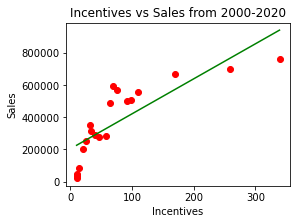

In [179]:
y = ev_multiple_info_df['Amount of EV Sales']
X = ev_multiple_info_df['Amount of Incentives']

X = X.values.reshape(-1, 1)  # values converts it into a numpy array
Y = y.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)  # make predictio
print(model.score(X, Y))

# plot the results
plt.figure(figsize=(4, 3))
ax = plt.axes()
ax.scatter(X, Y, color="red")
ax.plot(X, y_pred, color="green")

ax.set_xlabel('Incentives')
ax.set_ylabel('Sales')
ax.set_title('Incentives vs Sales from 2000-2020')
ax.axis('tight')


plt.show()

In [180]:
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
results.summary()  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     35.30
Date:                Sun, 21 Nov 2021   Prob (F-statistic):           1.27e-05
Time:                        21:39:14   Log-Likelihood:                -263.99
No. Observations:                  20   AIC:                             532.0
Df Residuals:                      18   BIC:                             534.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.043e+05   4.22e+04      4.842      0.000    1.16e+05    2.93e+05
x1          2174.5673    365.989      5.942      0.000    1405.653    2943.482
==============================================================================
Omnibus:                        1.353   Durbin-Watson:                   0.359
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                0.866
Skew:                          -0.047   Prob(JB):                        0.649
Kurtosis:                       1.985   Cond. No.                         158.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [181]:
y = ev_with_msrp_df['Amount of EV Sales']
features = ['Amount of Incentives', 'Average Base MSRP for All EVs']

X = ev_with_msrp_df[features].values.reshape(-1, len(features))  # values converts it into a numpy array
Y = y.values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
model = LinearRegression()
model.fit(X, Y)
y_pred = model.predict(X)  # make predictio
print(model.score(X,Y))
# # plot the results
# plt.figure(figsize=(4, 3))
# ax = plt.axes()
# ax.scatter(X, Y, color="red")
# ax.plot(X, y_pred, color="green")

# ax.set_xlabel('Incentives')
# ax.set_ylabel('Sales')
# ax.set_title('Incentives vs Sales from 2000-2020')
# ax.axis('tight')


# plt.show()

0.6522034749758199


In [182]:
X = sm.add_constant(X)
results = sm.OLS(Y,X).fit()
results.summary() 

C:\Users\eurydice\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     8.439
Date:                Sun, 21 Nov 2021   Prob (F-statistic):            0.00863
Time:                        21:39:19   Log-Likelihood:                -153.93
No. Observations:                  12   AIC:                             313.9
Df Residuals:                       9   BIC:                             315.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.339e+05   5.93e+04      5.626      0.000       2e+05    4.68e+05
x1          2006.6397    492.604      4.074      0.003     892.292    3120.987
x2            -0.0084      0.140     -0.060      0.954      -0.325       0.308
==============================================================================
Omnibus:                        1.226   Durbin-Watson:                   0.861
Prob(Omnibus):                  0.542   Jarque-Bera (JB):                0.766
Skew:                          -0.199   Prob(JB):                        0.682
Kurtosis:                       1.828   Cond. No.                     5.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""